<a href="https://colab.research.google.com/github/Aim-bro/Josh/blob/main/%EC%84%B1%EC%9D%B8_%EC%9D%B8%EA%B5%AC%EC%A1%B0%EC%82%AC_%EC%86%8C%EB%93%9D_%EC%98%88%EC%B8%A1_LGBM_clone_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 호출 및 I/O

In [11]:
!pip install scikit-learn
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from plotnine import *
import random
import gc
import os
# 모델링 라이브러리
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

from google.colab import drive
drive.mount('/content/drive')
sns.set_style("whitegrid")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train = pd.read_csv('/content/drive/MyDrive/adult/adult_train.csv', names = columns)
test = pd.read_csv('/content/drive/MyDrive/adult/adult_test.csv', names = columns)

# 데이터 간단히 둘러보기

In [16]:
train.shape, test.shape

((32561, 15), (16282, 15))

In [21]:
print(train.columns)
print(test.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [22]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
train.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [24]:
print(f'income count: {train["income"].count()}')
print(f'income not null count(pct): {np.round(train["income"].count()/len(train)*100, 2)}%')

income count: 32561
income not null count(pct): 100.0%


In [26]:
num_of_null = train.isnull().sum()
percent = (train.isnull().sum()/train.isnull().count()*100)
pd.concat([num_of_null, percent], axis=1, keys=['num_of_null', 'percent']).sort_values(by='percent', ascending=False)

,num_of_null,percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education_num,0,0.0
marital_status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


null값이 없음 gooooooood

In [27]:
num_of_null = test.isnull().sum()
percent = (test.isnull().sum()/test.isnull().count()*100)
pd.concat([num_of_null, percent], axis=1, keys=['num_of_null', 'percent']).sort_values(by='percent', ascending=False)

,num_of_null,percent
workclass,1,0.006142
fnlwgt,1,0.006142
education,1,0.006142
education_num,1,0.006142
marital_status,1,0.006142
occupation,1,0.006142
relationship,1,0.006142
race,1,0.006142
sex,1,0.006142
capital_gain,1,0.006142


In [33]:
test = test.dropna(subset=['workclass'])
print(test)

      age      workclass    fnlwgt  ... hours_per_week  native_country   income
1      25        Private  226802.0  ...           40.0   United-States   <=50K.
2      38        Private   89814.0  ...           50.0   United-States   <=50K.
3      28      Local-gov  336951.0  ...           40.0   United-States    >50K.
4      44        Private  160323.0  ...           40.0   United-States    >50K.
5      18              ?  103497.0  ...           30.0   United-States   <=50K.
...    ..            ...       ...  ...            ...             ...      ...
16277  39        Private  215419.0  ...           36.0   United-States   <=50K.
16278  64              ?  321403.0  ...           40.0   United-States   <=50K.
16279  38        Private  374983.0  ...           50.0   United-States   <=50K.
16280  44        Private   83891.0  ...           40.0   United-States   <=50K.
16281  35   Self-emp-inc  182148.0  ...           60.0   United-States    >50K.

[16281 rows x 15 columns]


In [34]:
num_of_null = test.isnull().sum()
percent = (test.isnull().sum()/test.isnull().count()*100)
pd.concat([num_of_null, percent], axis=1, keys=['num_of_null', 'percent']).sort_values(by='percent', ascending=False)

,num_of_null,percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education_num,0,0.0
marital_status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


test데이터 null값 삭제 완료

# 수치형 데이터 분석

## 단변량 데이터 시각화를 위한 함수

In [35]:
def get_min_max_avg(df, feature):
    print('Feature: ', feature)
    print('--------------------------------------')
    print('The max value is:',df[feature].max())
    print('The min value is:',df[feature].min())
    print('The average value is:',df[feature].mean())
    print('The median value is:',df[feature].median())

In [36]:
def plot_hist(df, feature, max_ylim, bins=10):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(df[feature], bins=bins)
    ax.set_ylim(0, max_ylim)
    ax.set_title(feature+' distribution (bins='+str(bins)+')')
    plt.show()

### Age

In [37]:
get_min_max_avg(train,'age')

Feature:  age
--------------------------------------
The max value is: 90
The min value is: 17
The average value is: 38.58164675532078
The median value is: 37.0


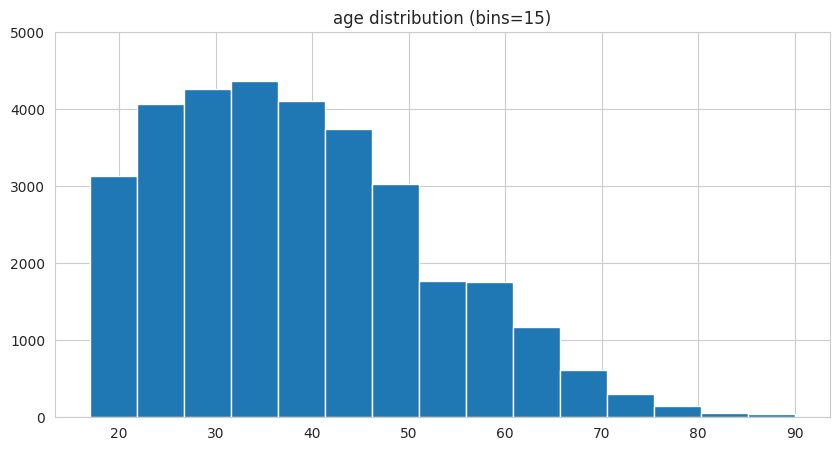

In [41]:
plot_hist(train, 'age', 5000, 15)

30~40세 부근에 가장 많은 인구가 몰려있는 것을 확인

### final weight

In [42]:
get_min_max_avg(train, 'fnlwgt')

Feature:  fnlwgt
--------------------------------------
The max value is: 1484705
The min value is: 12285
The average value is: 189778.36651208502
The median value is: 178356.0


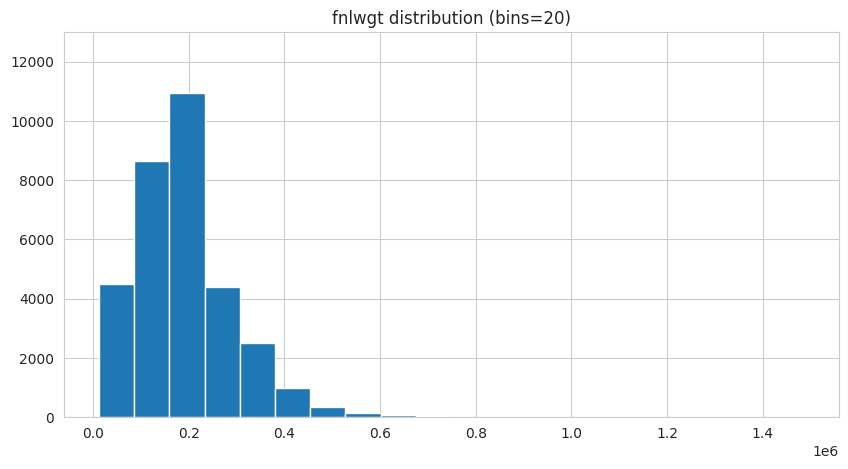

In [43]:
plot_hist(train, 'fnlwgt', 13000, 20)

### education_num

In [44]:
get_min_max_avg(train, 'education_num')

Feature:  education_num
--------------------------------------
The max value is: 16
The min value is: 1
The average value is: 10.0806793403151
The median value is: 10.0


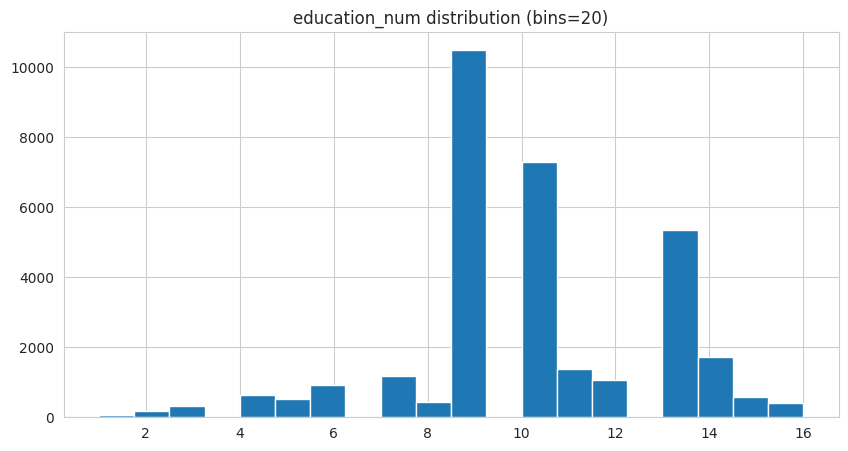

In [46]:
plot_hist(train, 'education_num', 11000, 20)

### Capital gain

In [47]:
get_min_max_avg(train, 'capital_gain')

Feature:  capital_gain
--------------------------------------
The max value is: 99999
The min value is: 0
The average value is: 1077.6488437087312
The median value is: 0.0


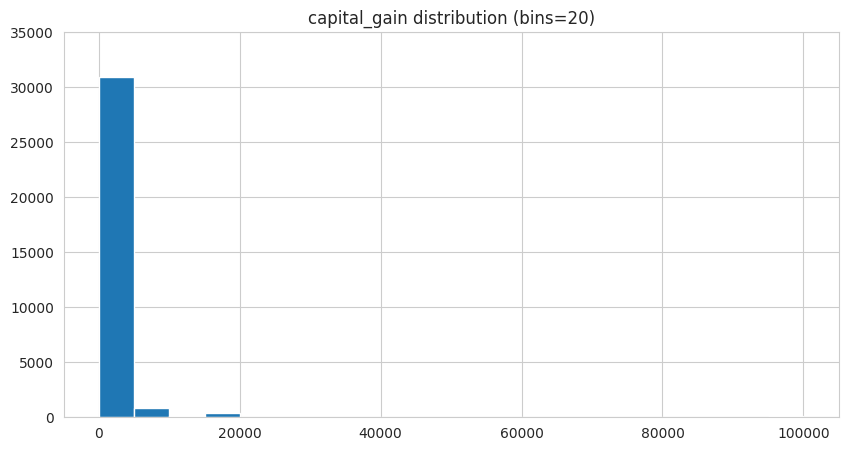

In [50]:
plot_hist(train, 'capital_gain', 35000, 20)

### Capital loss

In [51]:
get_min_max_avg(train, 'capital_loss')

Feature:  capital_loss
--------------------------------------
The max value is: 4356
The min value is: 0
The average value is: 87.303829734959
The median value is: 0.0


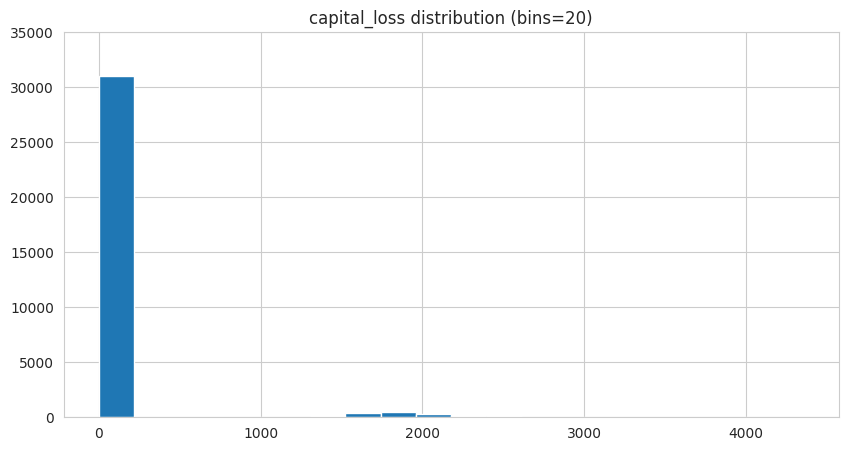

In [52]:
plot_hist(train, 'capital_loss', 35000, 20)

### Hours per week

In [53]:
get_min_max_avg(train, 'hours_per_week')

Feature:  hours_per_week
--------------------------------------
The max value is: 99
The min value is: 1
The average value is: 40.437455852092995
The median value is: 40.0


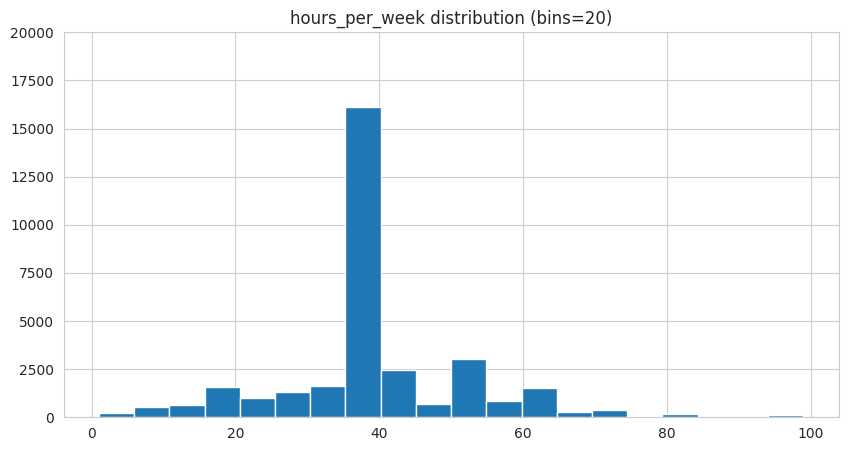

In [55]:
plot_hist(train, 'hours_per_week', 20000, 20)

## 다변량 데이터 시각화

### 나이에 따른 소득 수준

<Figure size 640x480 with 0 Axes>

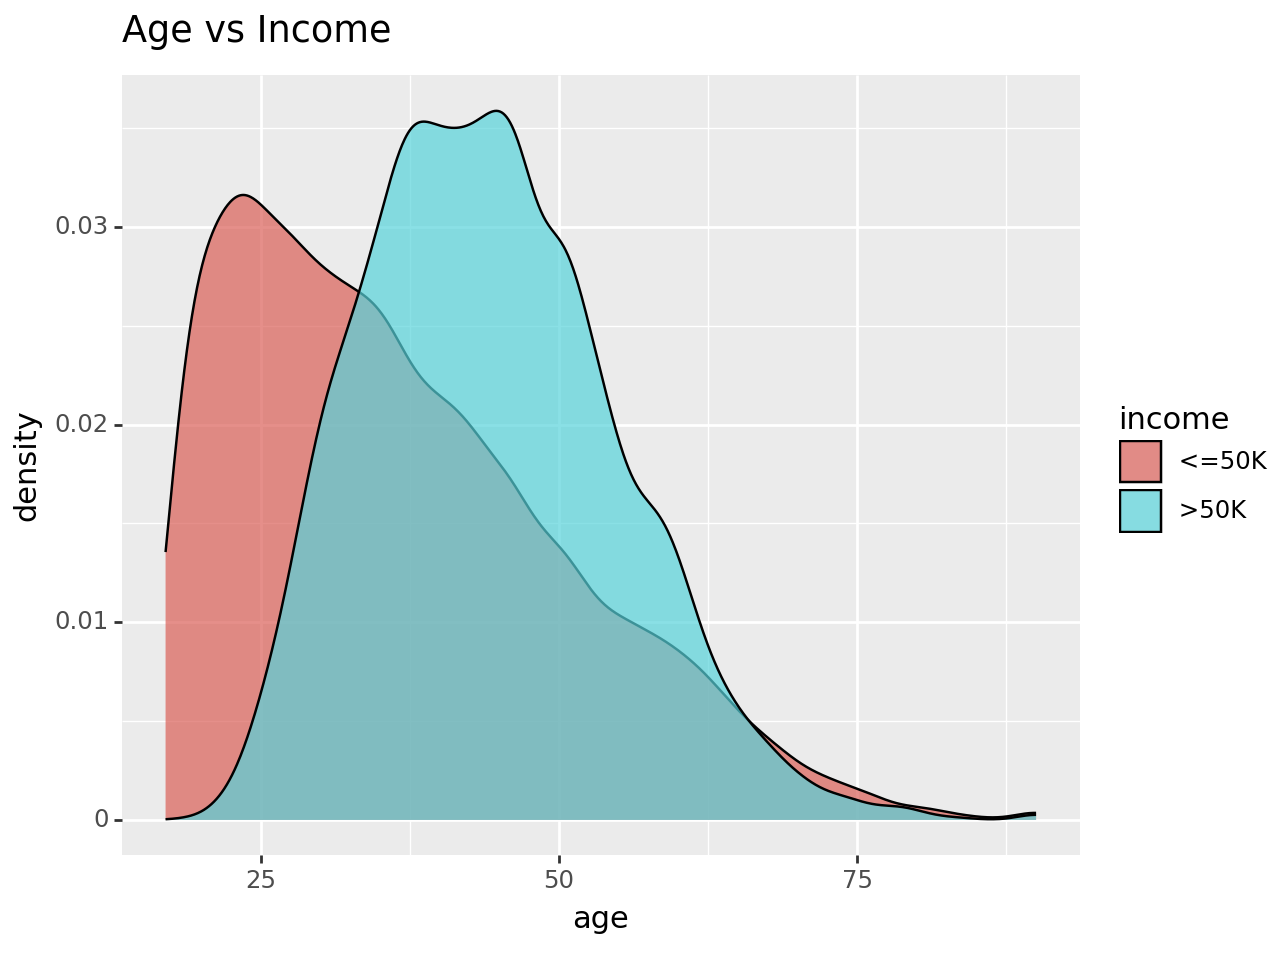

<Figure Size: (640 x 480)>

In [56]:
fig = plt.figure()
ggplot(train,aes(x='age', fill='income')) + geom_density(alpha=0.7) + ggtitle('Age vs Income')

- income이 많을수록 나이가 많다는 것을 확인
- income을 예측하는데 나이는 중요한 변수임을 알 수 있다

<Figure size 640x480 with 0 Axes>

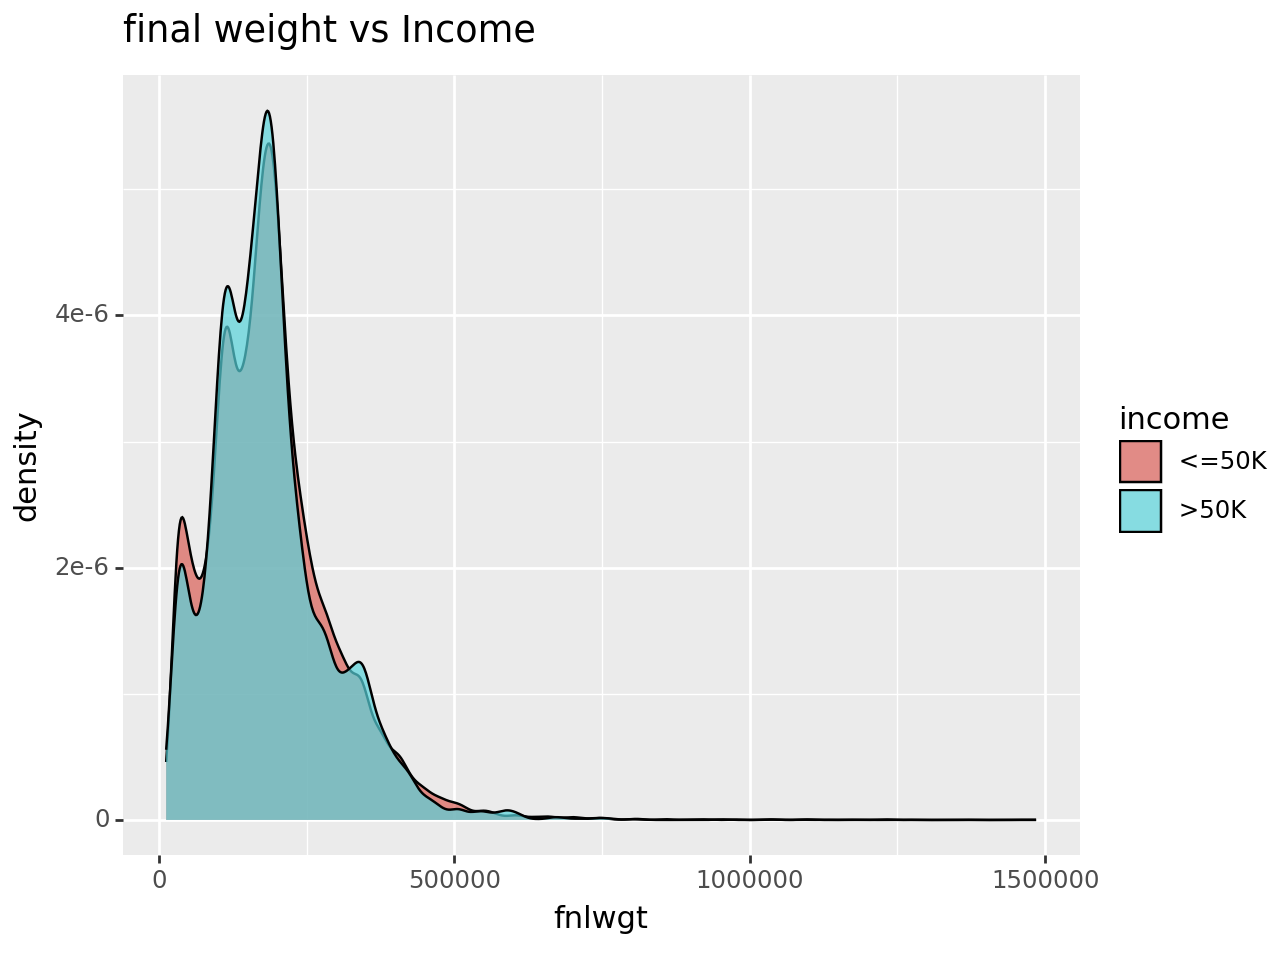

<Figure Size: (640 x 480)>

In [60]:
fig = plt.figure()
ggplot(train,aes(x='fnlwgt', fill='income')) + geom_density(alpha=0.7) + ggtitle('final weight vs Income')

### 교육에 따른 소득 수준

<Figure size 640x480 with 0 Axes>

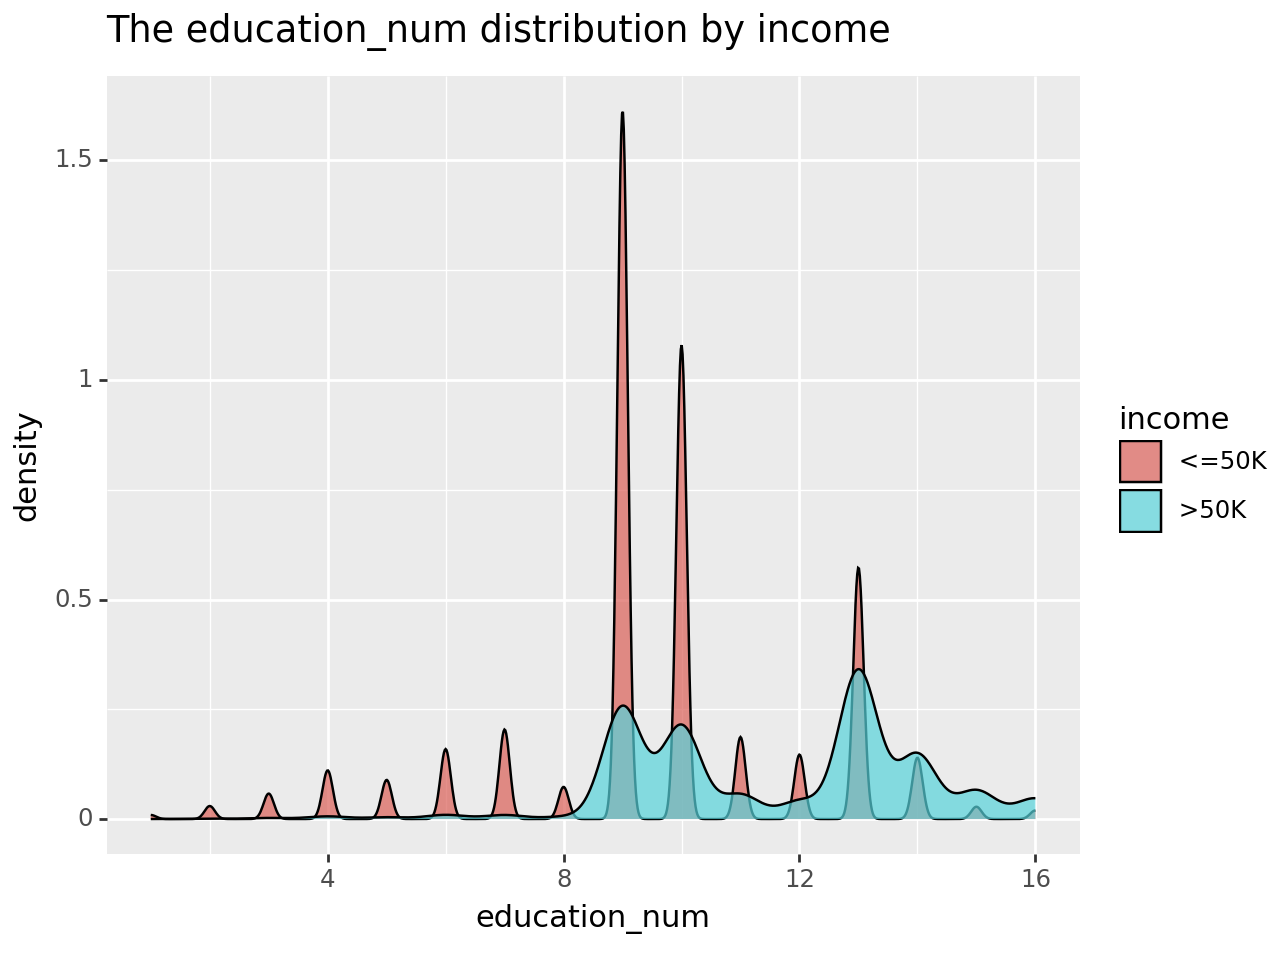

<Figure Size: (640 x 480)>

In [61]:
fig = plt.figure()
ggplot(train, aes(x='education_num', fill='income')) + geom_density(alpha=0.7) + ggtitle('The education_num distribution by income')

나머진 그다지 연관이 없는것 같다.

In [62]:
train[train['income'] == ' >50K']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


<Figure size 640x480 with 0 Axes>

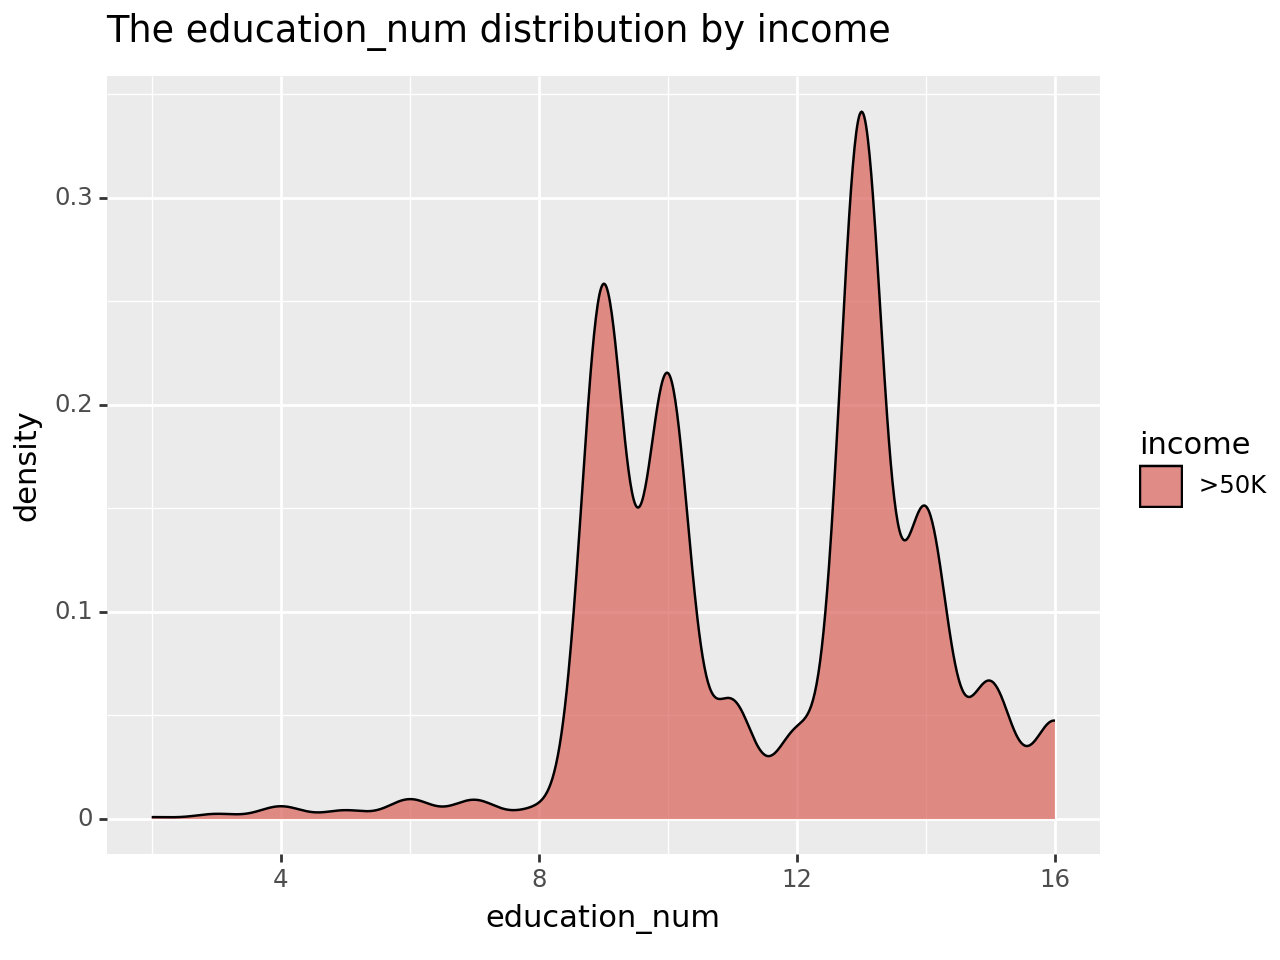

<Figure Size: (640 x 480)>

In [63]:
fig = plt.figure()

ggplot(train[train['income'] == ' >50K'], aes(x='education_num', fill='income')) + geom_density(alpha=0.7) + ggtitle('The education_num distribution by income')

- 소득 수준이 높은 사람 대부분 education_num = 8 이상의 교육을 받은걸 확인
- 교육을 오래 받았음에도 소득 수준이 낮은 사람 존재

<ipython-input-65-d1469cdd8462>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



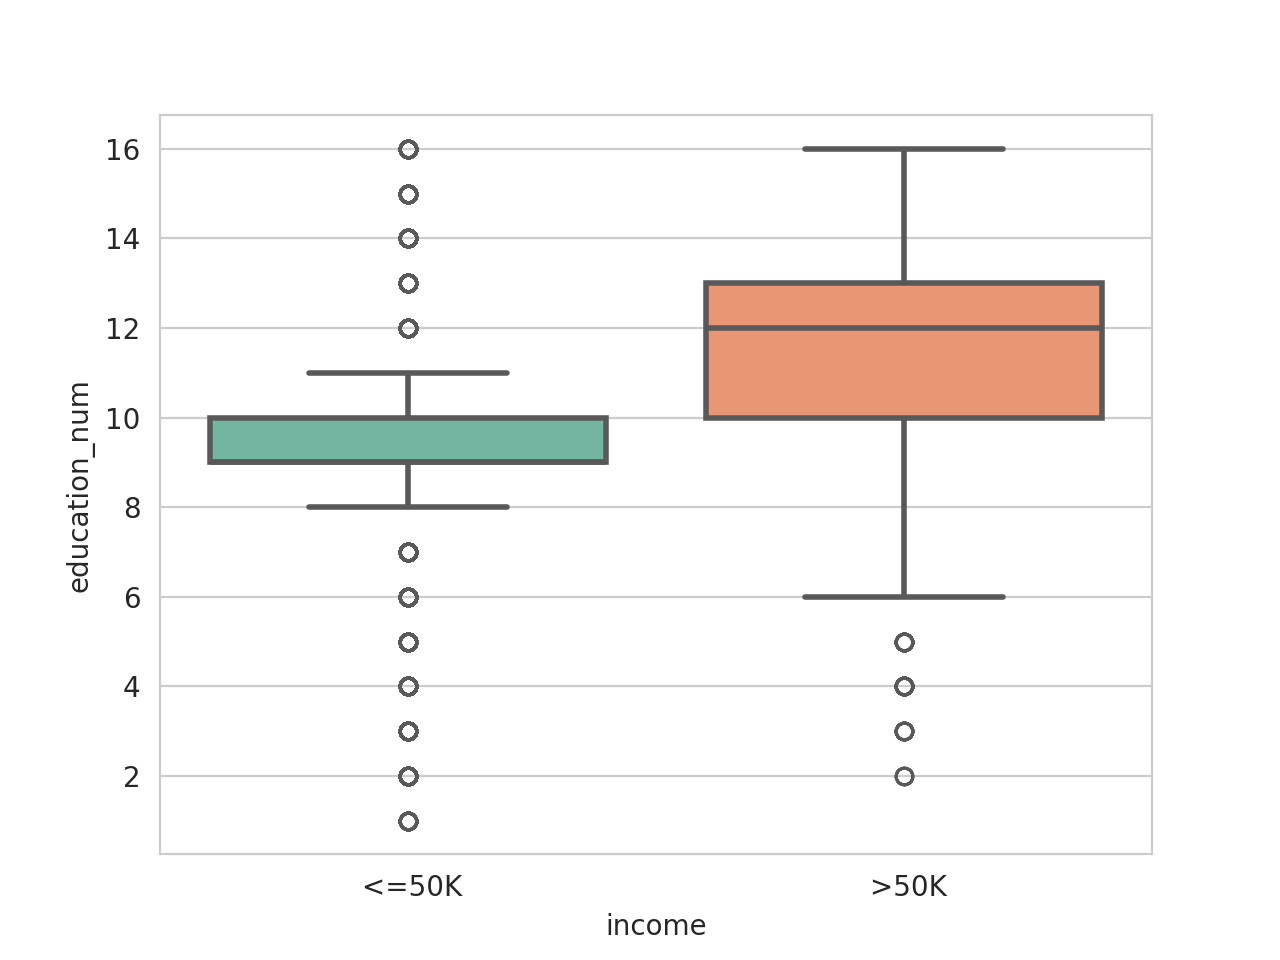

In [65]:
sns.boxplot(x='income', y ='education_num', data = train, palette='Set2', linewidth=2);

교육을 오랫동안 받은 사람의 소득수준이 확실히 더 높다는 것을 확인

### 양도세에 따른 소득 수준

<Figure size 640x480 with 0 Axes>

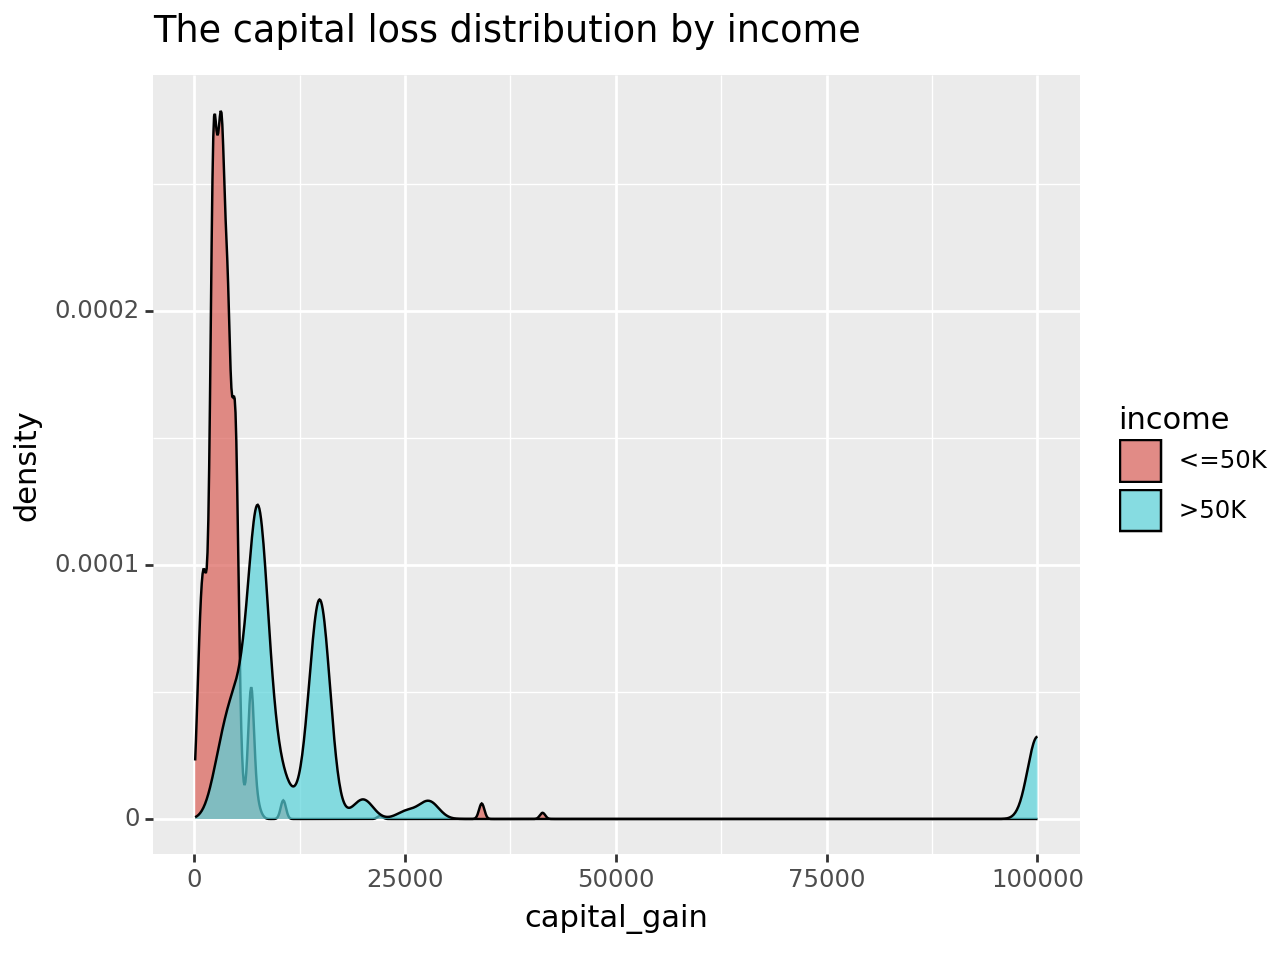

<Figure Size: (640 x 480)>

In [66]:
fig = plt.figure()
ggplot(train.loc[train['capital_gain'] > 0], aes(x='capital_gain', fill='income')) + geom_density(alpha=0.7) + ggtitle('The capital loss distribution by income')

<ipython-input-67-beb790537df6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



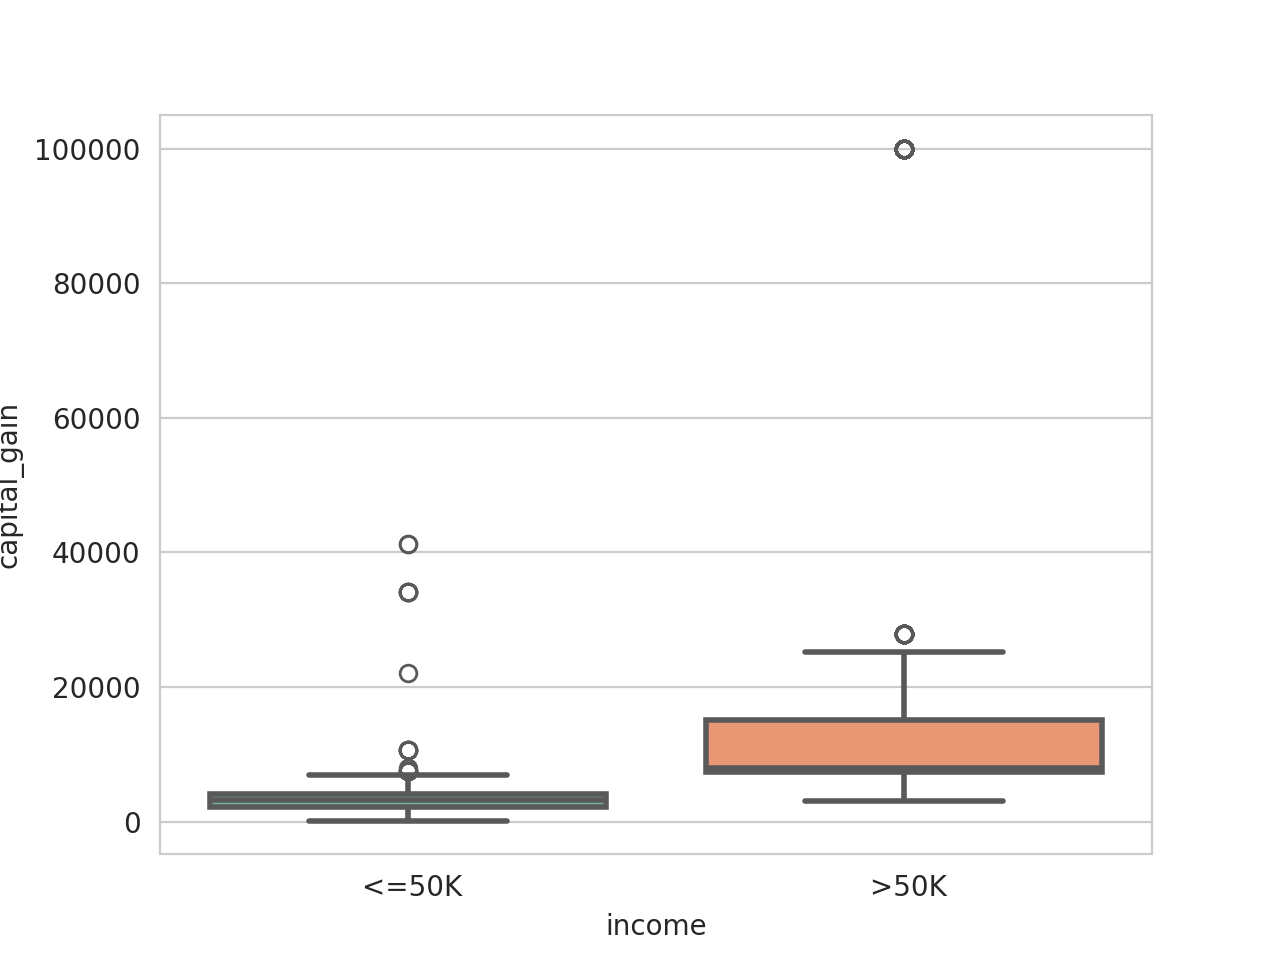

In [67]:
sns.boxplot(x='income', y='capital_gain', data=train.loc[train['capital_gain'] > 0], palette="Set2", linewidth=2);

- 양도 소득이 많을수록 소득 수준도 높다
- 양도 소득에 굉장히 높은 이상치 존재

<Figure size 640x480 with 0 Axes>

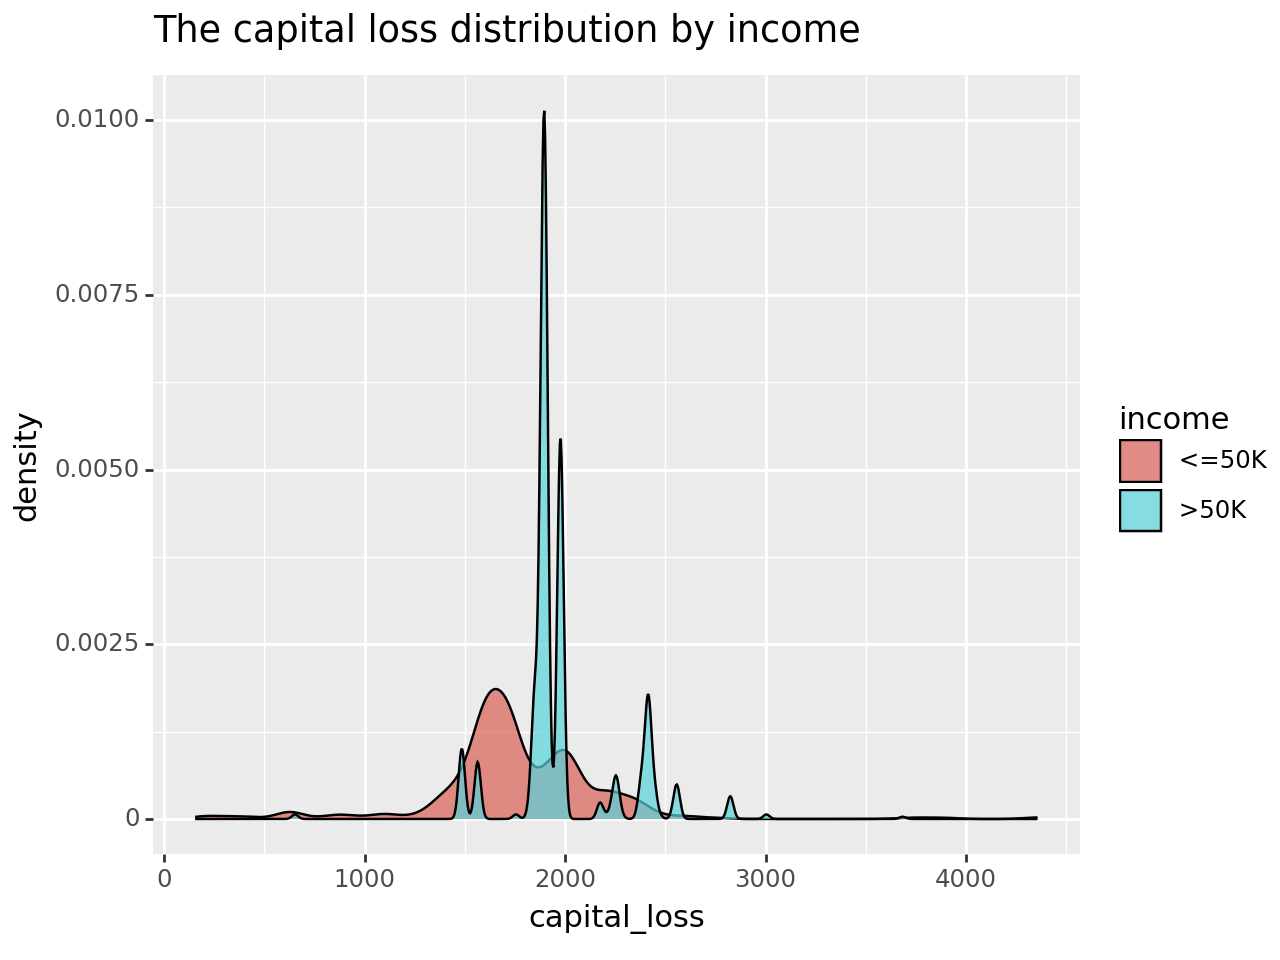

<Figure Size: (640 x 480)>

In [68]:
fig = plt.figure();
ggplot(train.loc[train['capital_loss'] > 0], aes(x='capital_loss', fill='income')) + geom_density(alpha=0.7) + ggtitle('The capital loss distribution by income')

<ipython-input-69-dfd39fe55315>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



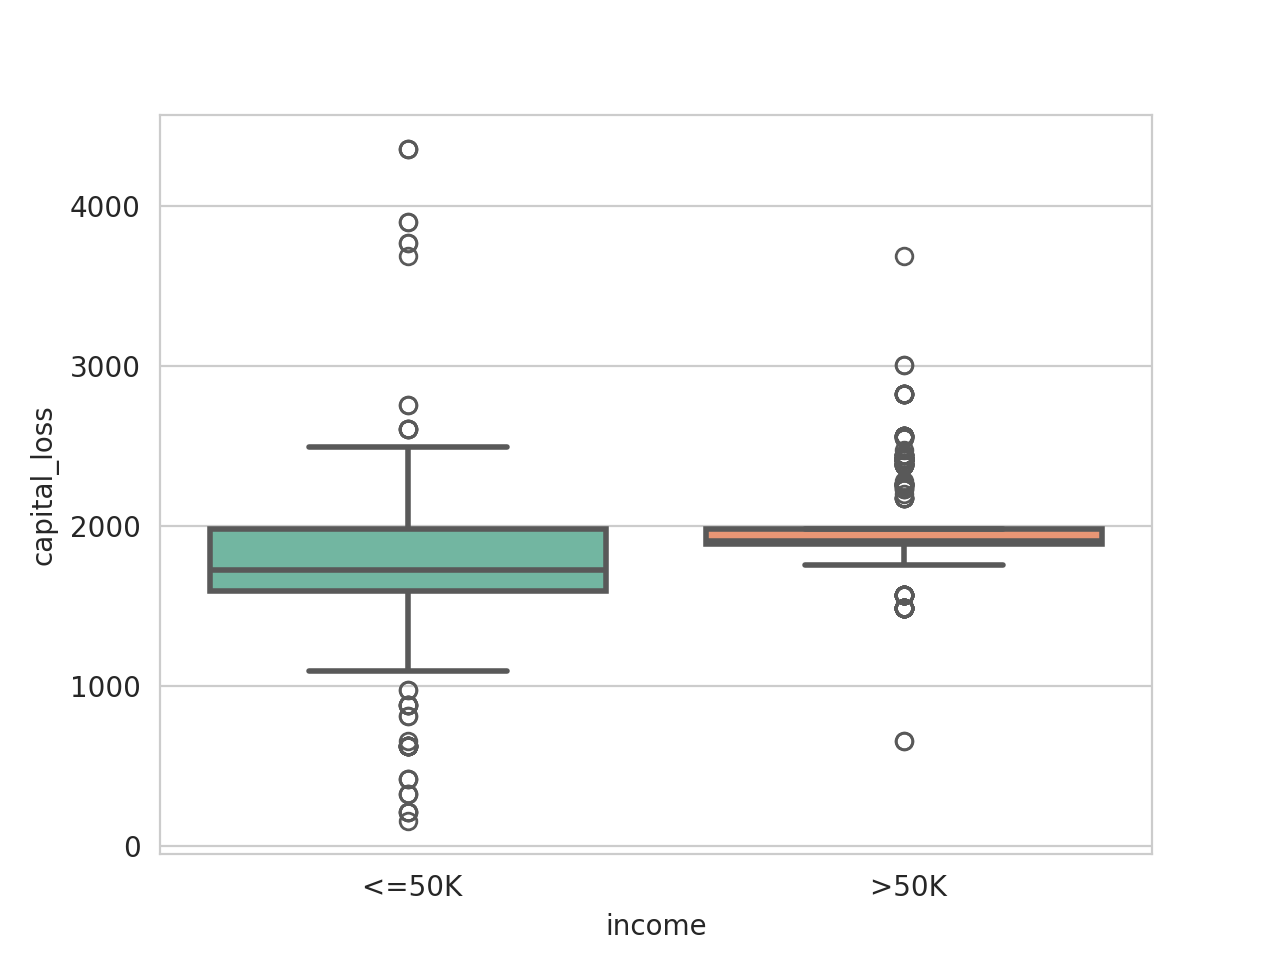

In [69]:
sns.boxplot(x='income', y='capital_loss', data=train.loc[train['capital_loss'] > 0], palette="Set2", linewidth=2);

### 주당 근무시간에 따른 소득 수준

<Figure size 640x480 with 0 Axes>

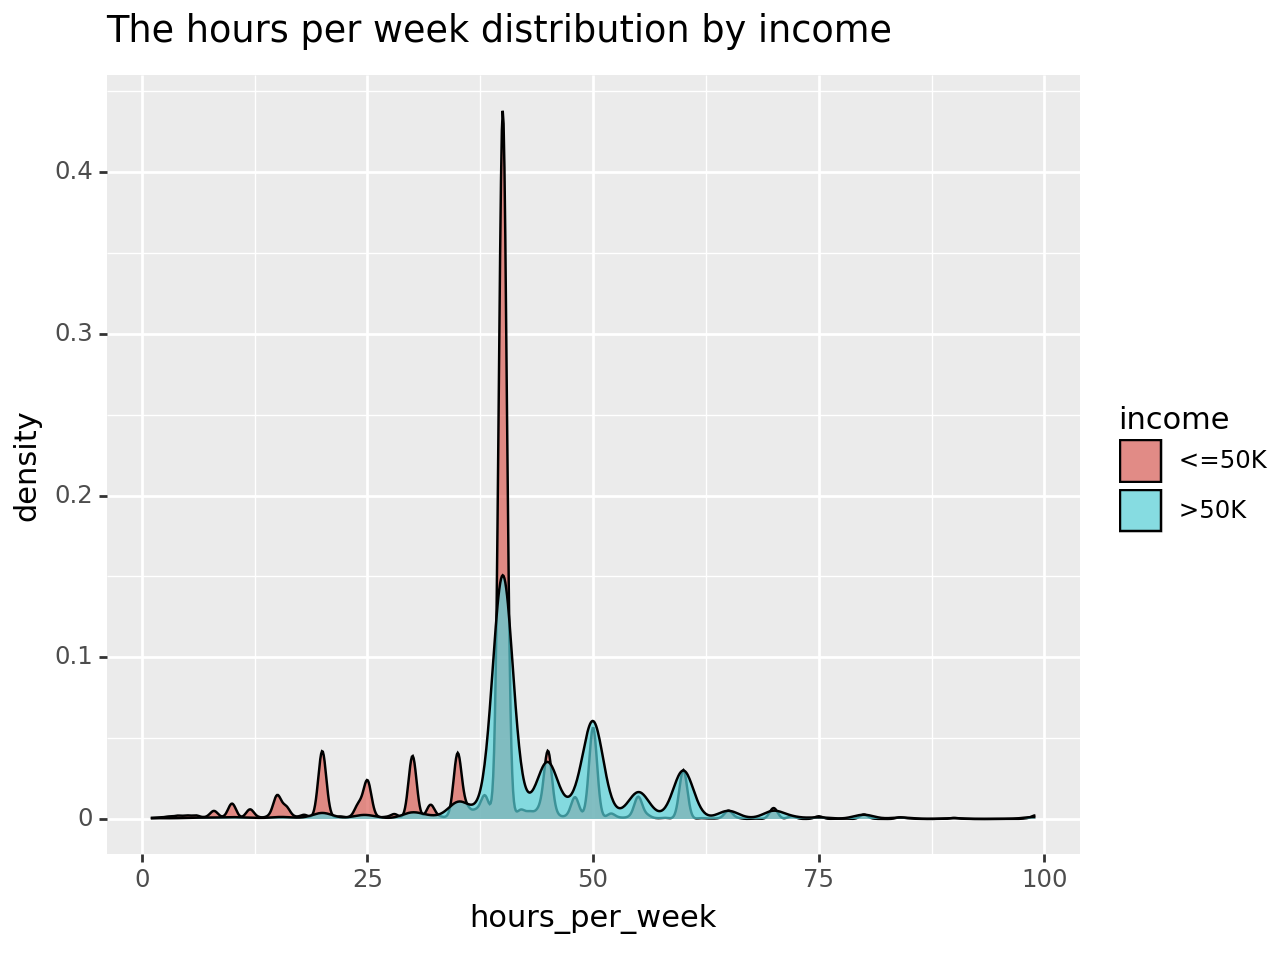

<Figure Size: (640 x 480)>

In [70]:
fig = plt.figure()
ggplot(train, aes(x='hours_per_week', fill='income')) + geom_density(alpha=0.7) + ggtitle('The hours per week distribution by income')

<ipython-input-71-06f889aa72f5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



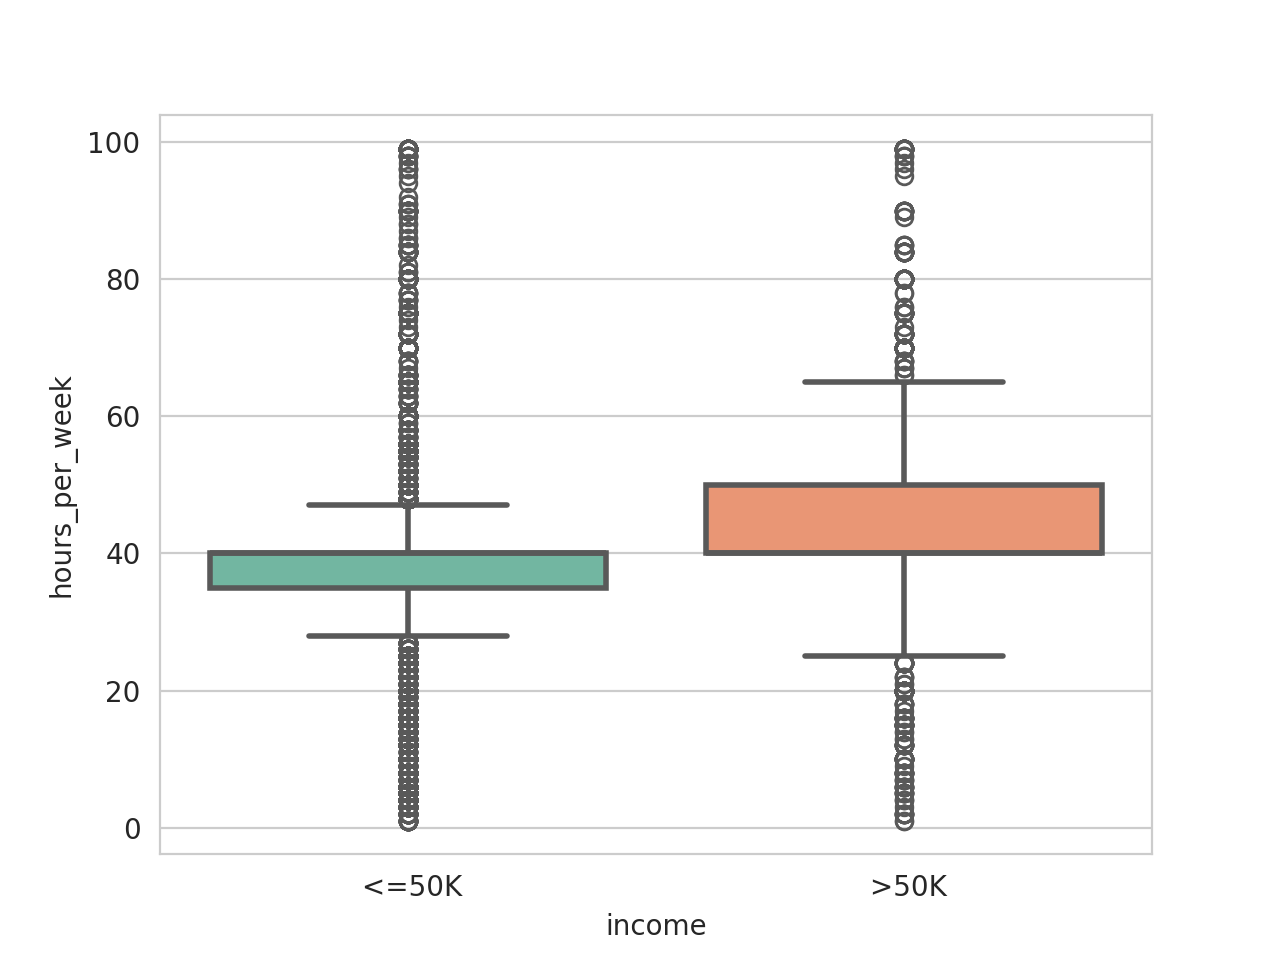

In [71]:
sns.boxplot(x='income', y='hours_per_week', data=train, palette="Set2", linewidth=2);

- 주당 평균 근무시간이 길수록 소득수준도 높은걸 확인

# 범주형 데이터 분석

In [72]:
for col in train.columns:
    if train[col].dtype == 'object':
        all_categories = train[col].unique()
        print(f'Column "{col}" has {len(all_categories)} unique categroies')
        print('The categories are:', ', '.join(all_categories))
        print()

Column "workclass" has 9 unique categroies
The categories are:  State-gov,  Self-emp-not-inc,  Private,  Federal-gov,  Local-gov,  ?,  Self-emp-inc,  Without-pay,  Never-worked

Column "education" has 16 unique categroies
The categories are:  Bachelors,  HS-grad,  11th,  Masters,  9th,  Some-college,  Assoc-acdm,  Assoc-voc,  7th-8th,  Doctorate,  Prof-school,  5th-6th,  10th,  1st-4th,  Preschool,  12th

Column "marital_status" has 7 unique categroies
The categories are:  Never-married,  Married-civ-spouse,  Divorced,  Married-spouse-absent,  Separated,  Married-AF-spouse,  Widowed

Column "occupation" has 15 unique categroies
The categories are:  Adm-clerical,  Exec-managerial,  Handlers-cleaners,  Prof-specialty,  Other-service,  Sales,  Craft-repair,  Transport-moving,  Farming-fishing,  Machine-op-inspct,  Tech-support,  ?,  Protective-serv,  Armed-Forces,  Priv-house-serv

Column "relationship" has 6 unique categroies
The categories are:  Not-in-family,  Husband,  Wife,  Own-chil

In [73]:
for col in train.columns:
  if train[col].dtype == 'object':
    categories = train[col].unique()
    print(f'The number of unique values in [{col}]: {len(categories)}')

The number of unique values in [workclass]: 9
The number of unique values in [education]: 16
The number of unique values in [marital_status]: 7
The number of unique values in [occupation]: 15
The number of unique values in [relationship]: 6
The number of unique values in [race]: 5
The number of unique values in [sex]: 2
The number of unique values in [native_country]: 42
The number of unique values in [income]: 2


In [75]:
def get_unique_values(df, feature):
    all_categories = train[feature].unique()
    print(f'Column "{feature}" has {len(all_categories)} unique categroies')
    print('------------------------------------------')
    print('\n'.join(all_categories))

### Workclass

In [76]:
get_unique_values(train, 'workclass')

Column "workclass" has 9 unique categroies
------------------------------------------
 State-gov
 Self-emp-not-inc
 Private
 Federal-gov
 Local-gov
 ?
 Self-emp-inc
 Without-pay
 Never-worked


<ipython-input-88-86e00a7f9711>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



<Axes: xlabel='workclass', ylabel='count'>

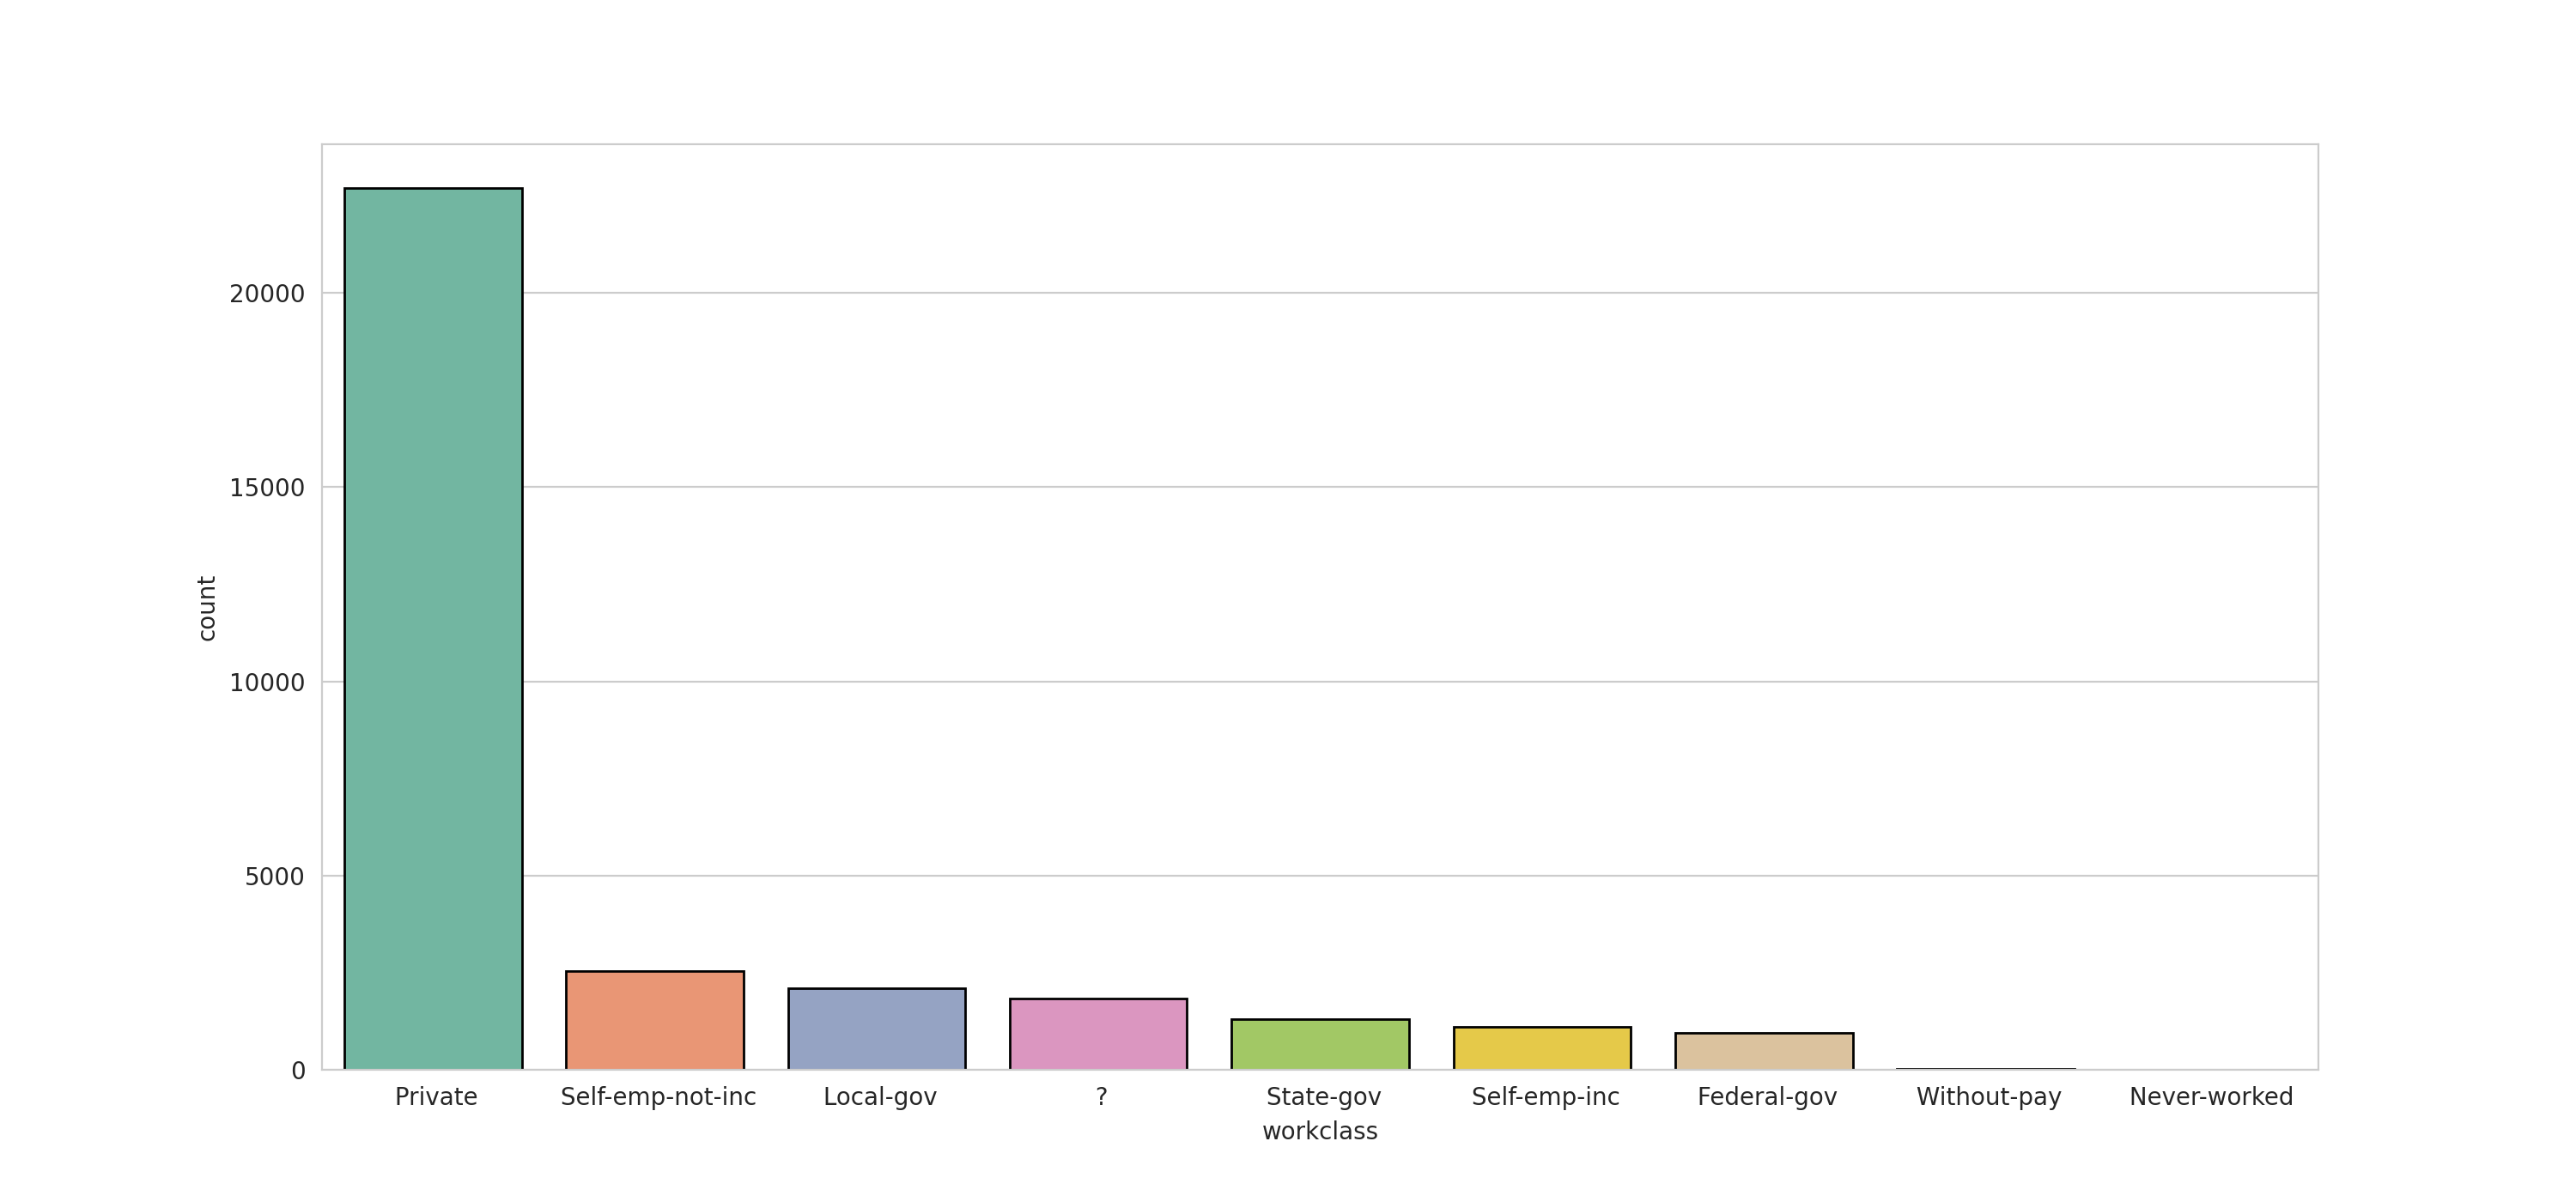

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
col = 'workclass'
value_counts = train[col].value_counts()
sns.countplot(x=col, data=train, palette="Set2", edgecolor='black', order = value_counts.index)



- Private에 해당하는 workclass가 가장 많음

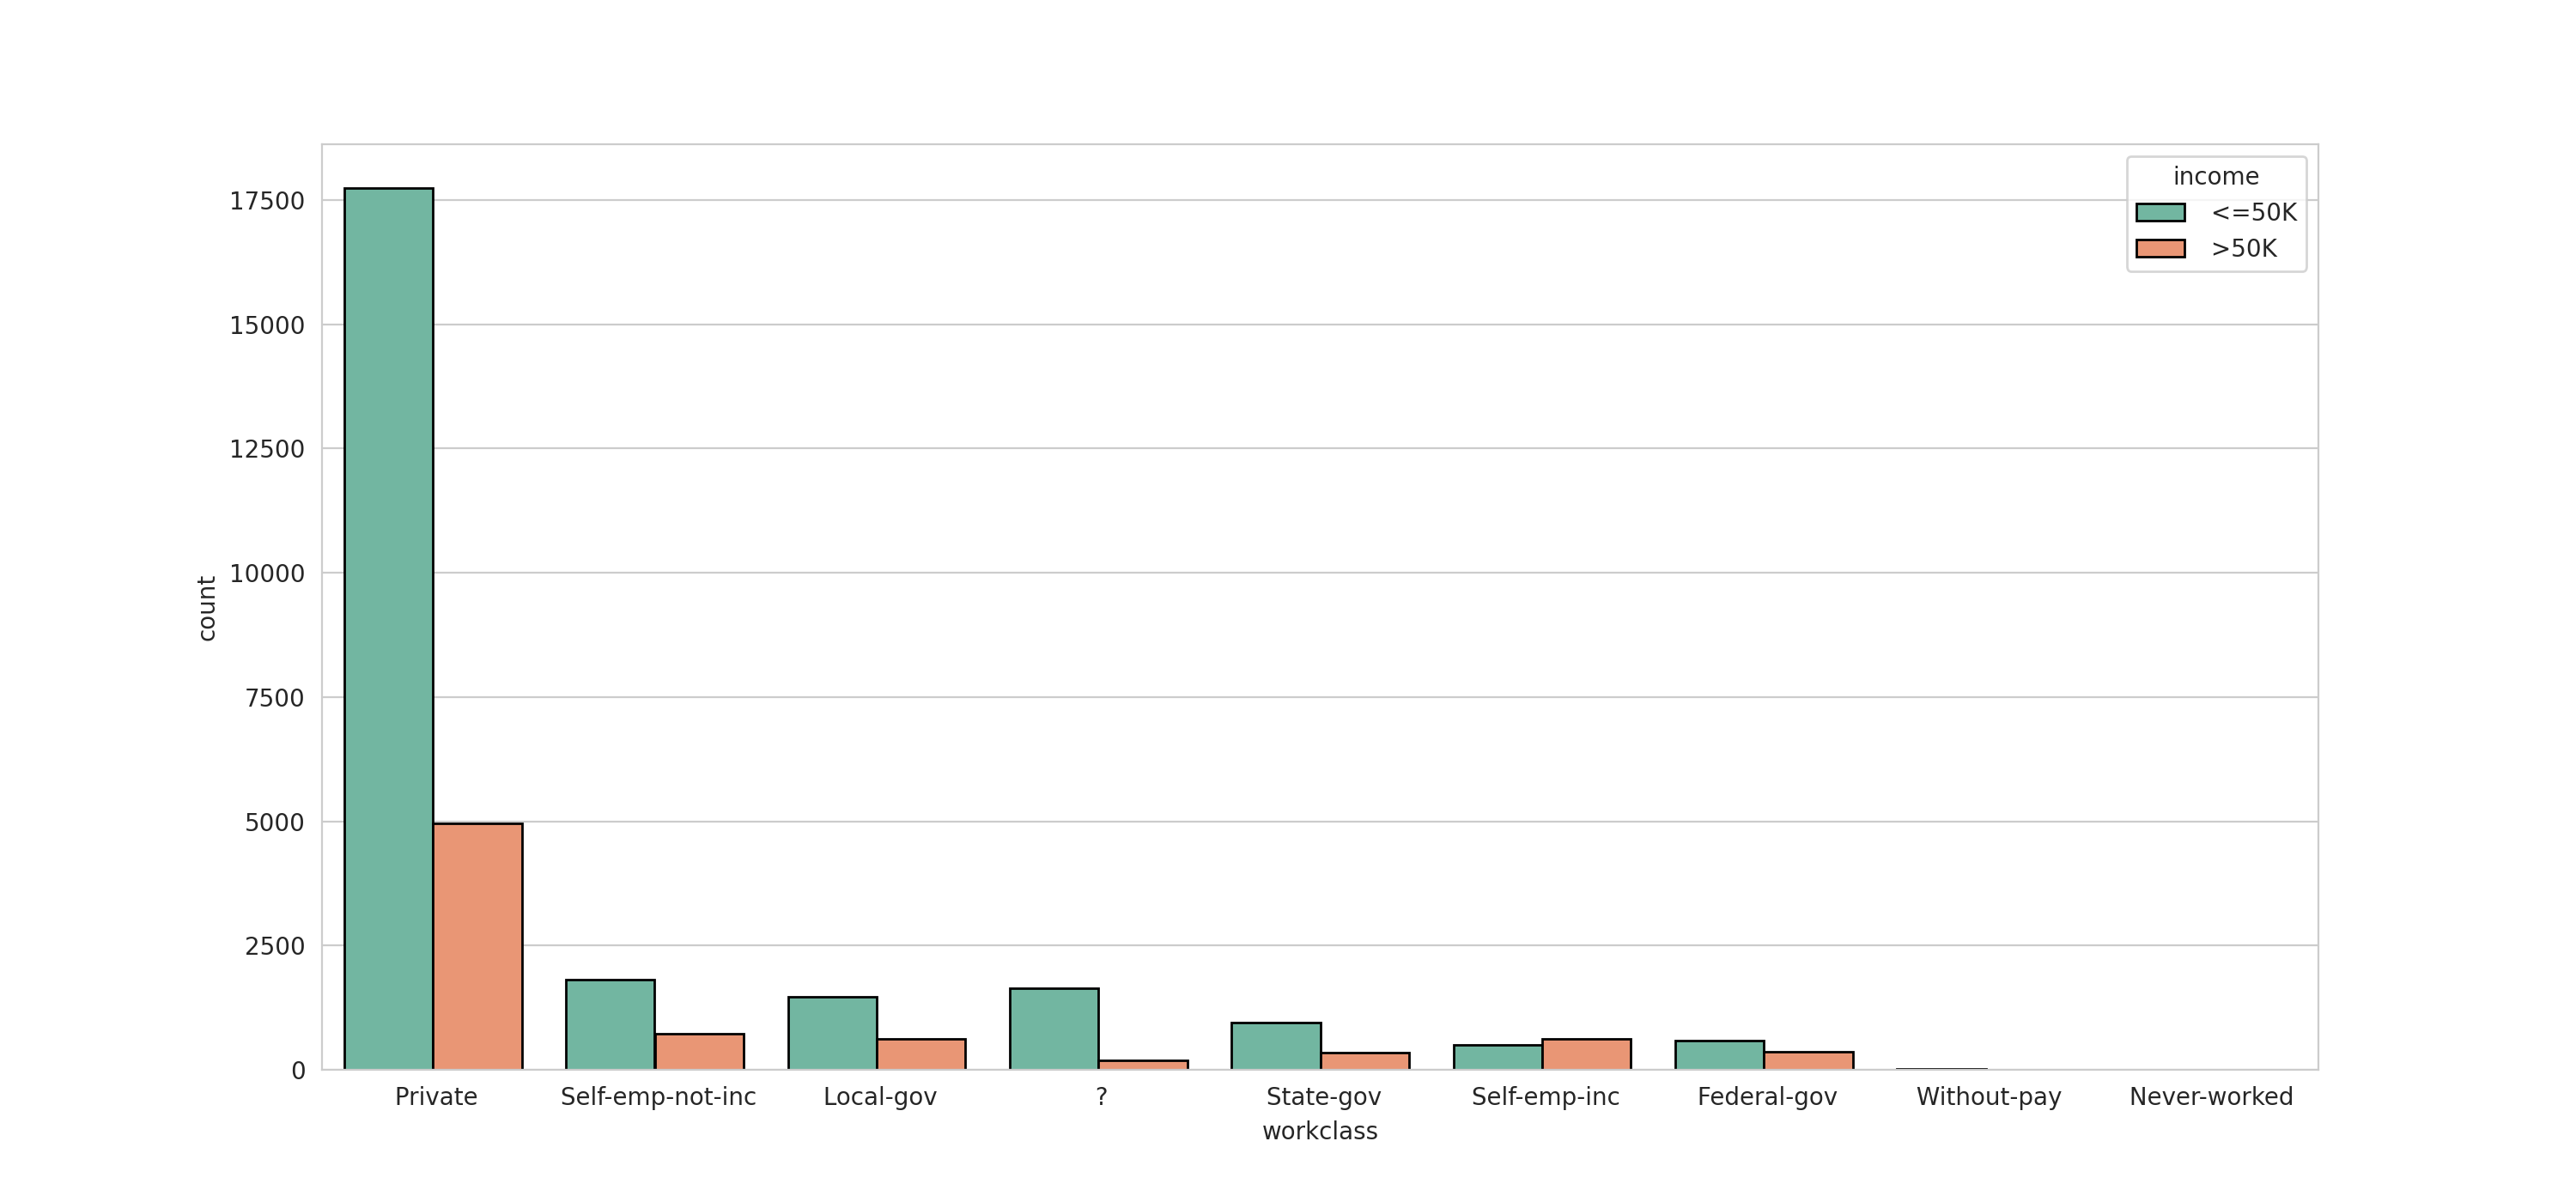

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
value_counts = train[col].value_counts()
sns.countplot(x=col, hue='income', data=train, palette="Set2", edgecolor='black', order = value_counts.index);

### Education

In [90]:
get_unique_values(train, 'education')

Column "education" has 16 unique categroies
------------------------------------------
 Bachelors
 HS-grad
 11th
 Masters
 9th
 Some-college
 Assoc-acdm
 Assoc-voc
 7th-8th
 Doctorate
 Prof-school
 5th-6th
 10th
 1st-4th
 Preschool
 12th


<ipython-input-92-2df8f789f2cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ' HS-grad'),
  Text(1, 0, ' Some-college'),
  Text(2, 0, ' Bachelors'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Assoc-voc'),
  Text(5, 0, ' 11th'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' 10th'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Prof-school'),
  Text(10, 0, ' 9th'),
  Text(11, 0, ' 12th'),
  Text(12, 0, ' Doctorate'),
  Text(13, 0, ' 5th-6th'),
  Text(14, 0, ' 1st-4th'),
  Text(15, 0, ' Preschool')])

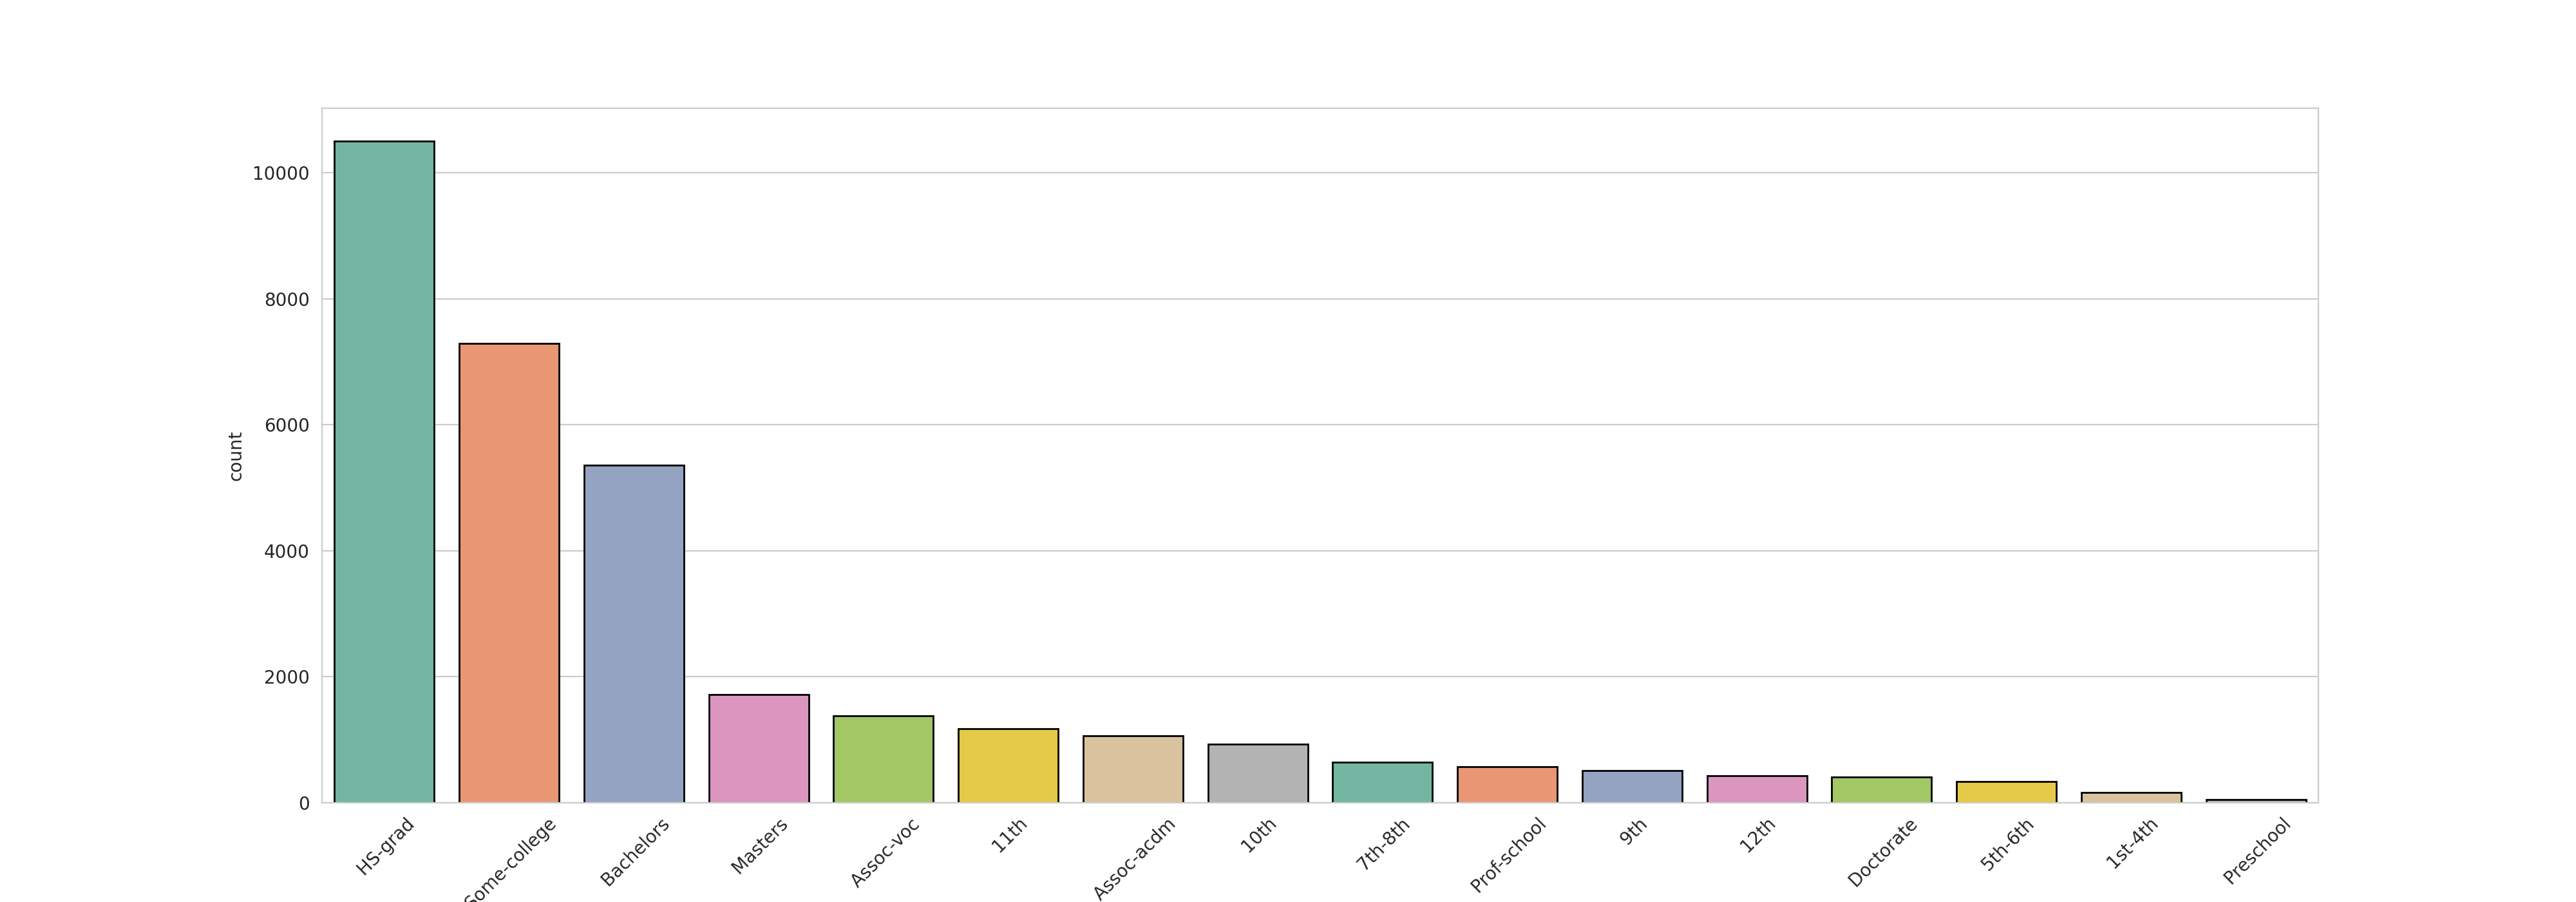

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
col = 'education'
value_counts = train[col].value_counts()
sns.countplot(x=col, data=train, palette="Set2", edgecolor='black', order = value_counts.index)
plt.xticks(rotation=45)

학력 수준은 고졸, 단과대, 학사 순으로 많음

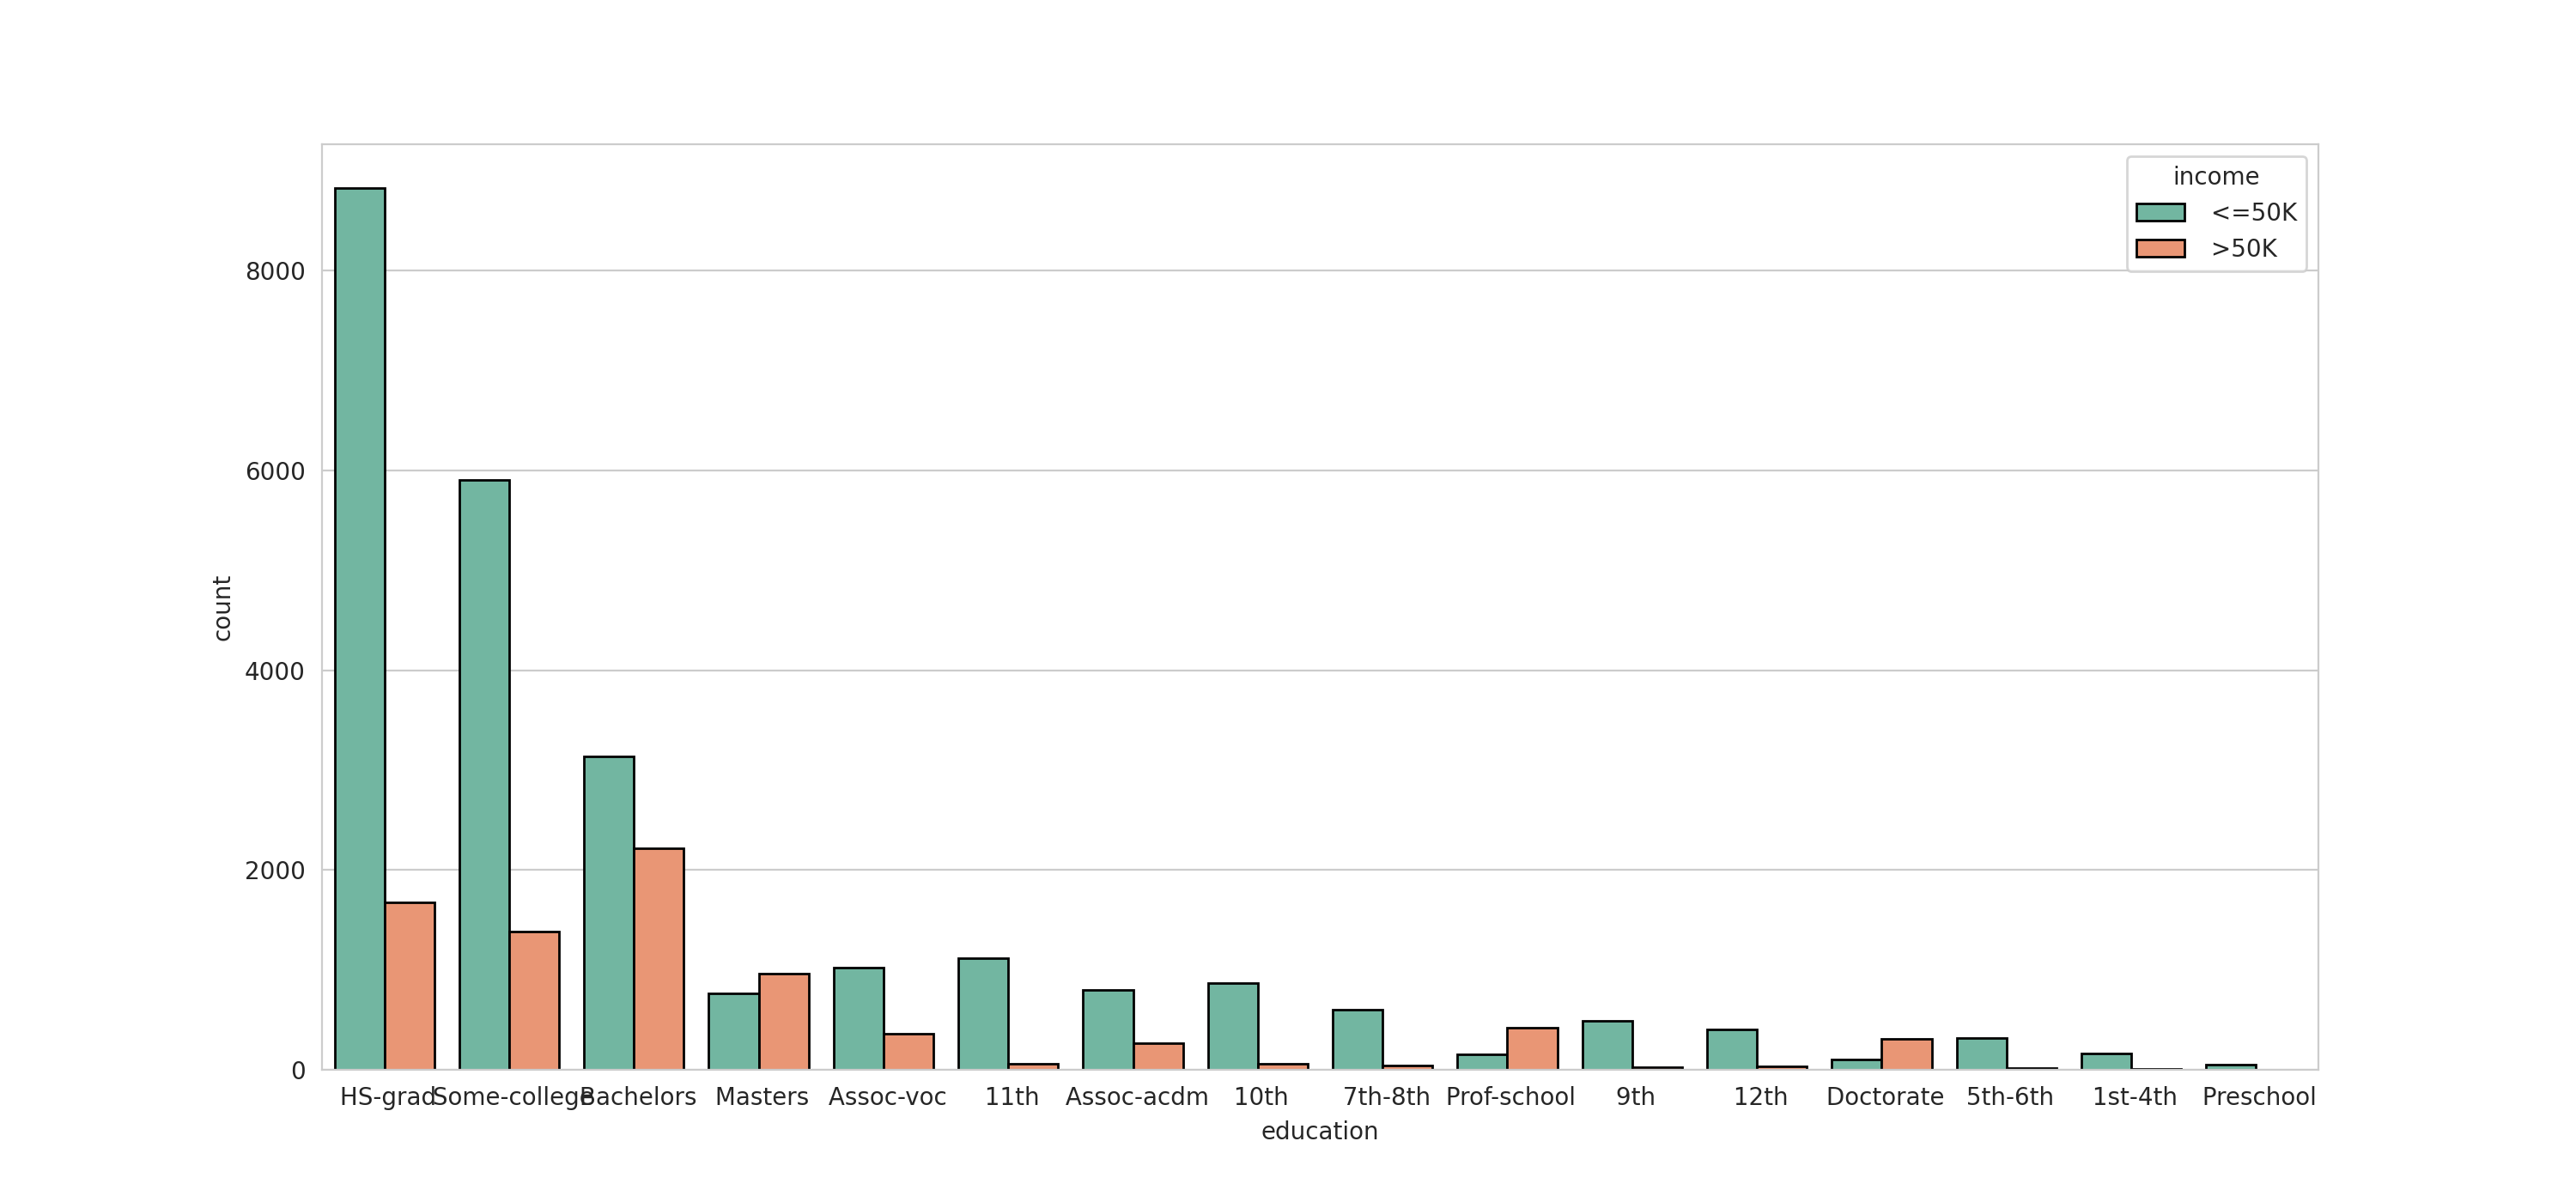

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
value_counts = train[col].value_counts()
sns.countplot(x=col, hue='income', data=train, palette="Set2", edgecolor='black', order = value_counts.index);